## 상품별 매출액

In [ ]:
# 데이터 분석 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#데이터 시각화(추세 등) 패키지
import seaborn as sns

# 가설검정 및 통계분석 패키지
from scipy import stats

In [ ]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 26 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc

# colab 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

# font 적용
plt.rc('font', family = 'NanumBarunGothic')

# ggplot 으로 그래프 스타일 설정
plt.style.use('ggplot')

# 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
%config InlineBackend.figure_format = 'retina'

In [ ]:
# warning 방지
import warnings  
warnings.filterwarnings(action = 'ignore')

In [ ]:
data_2 = pd.read_csv('/content/sample_data/product_파생변수 생성_최종.csv')
data_2

,Unnamed: 0,물품대분류,상품명,물품판매량,제품단가,브랜드명,물품분류,물품중분류,기저귀 유형,기저귀 단계,Age_Range,평균 배송리드타임,평균 할인금액
0,0,FC,(1+1) 좋은느낌 입는 오버나이트 대형 8개입,15,0,좋은느낌,여성용품,생리대,NaN,NaN,NaN,4.0,0.0
1,1,FC,(1+1) 좋은느낌 입는 오버나이트 중형 8개입,10,0,좋은느낌,여성용품,생리대,NaN,NaN,NaN,4.0,0.0
2,2,FC,(1+1) 화이트 입는 오버나이트 대형 L 8개입 (EA),27,0,화이트,여성용품,생리대,NaN,NaN,NaN,4.0,0.0
3,3,FC,(1+1) 화이트 입는 오버나이트 중형 M 8개입 (EA),12,0,화이트,여성용품,생리대,NaN,NaN,NaN,3.0,0.0
4,4,FC,(핫딜위크/1+1) 좋은느낌 입는 오버나이트 대형 8개입,4,0,좋은느낌,여성용품,생리대,NaN,NaN,NaN,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,3043,팬티,하기스 에어솔솔 썸머팬티 6단계 여아용 68매(팬티형),4,47360,하기스,베이비용품,기저귀,팬티형,6.0,유아,4.0,11103.0
3044,3044,팬티,하기스 에어솔솔 팬티 4단계 남아용 96매(팬티형),18,71040,하기스,베이비용품,기저귀,팬티형,4.0,영아,3.0,21219.0
3045,3045,팬티,하기스 에어솔솔 팬티 4단계 여아용 96매(팬티형),17,66861,하기스,베이비용품,기저귀,팬티형,4.0,영아,3.0,20949.0
3046,3046,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),81,68994,하기스,베이비용품,기저귀,팬티형,5.0,유아,3.0,21496.0


In [ ]:
data_1 = pd.read_csv('/content/sample_data/sales_파생변수 생성.csv')
data_1

,Unnamed: 0,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,배송리드타임,구매일_연도,구매일_월,구매일_일,구매일_요일,할인금액
0,0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),5,2019,5,6,Monday,9486
1,1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),3,2020,2,20,Thursday,13431
2,2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,5,2019,2,28,Thursday,1810
3,3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),3,2019,5,13,Monday,11598
4,4,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),3,2019,5,10,Friday,10852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,크리넥스 뽑아쓰는 키친타월 펭수에디션 140매 X 4입 (EA),3,2020,7,24,Friday,2460
199995,199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,맘큐 허그박스,3,2020,7,29,Wednesday,0
199996,199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,NEW 하기스 맥스드라이 팬티 3단계 공용 20매(팬티형/체험팩) (EA),4,2020,8,3,Monday,59
199997,199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,맘큐 허그박스,5,2020,8,6,Thursday,0


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3048 non-null   int64  
 1   물품대분류       3048 non-null   object 
 2   상품명         3048 non-null   object 
 3   물품판매량       3048 non-null   int64  
 4   제품단가        3048 non-null   int64  
 5   브랜드명        3034 non-null   object 
 6   물품분류        3034 non-null   object 
 7   물품중분류       3032 non-null   object 
 8   기저귀 유형      682 non-null    object 
 9   기저귀 단계      655 non-null    float64
 10  Age_Range   654 non-null    object 
 11  평균 배송리드타임   3016 non-null   float64
 12  평균 할인금액     3016 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 309.7+ KB


In [ ]:
df_raw_LEFT_JOIN = pd.merge(data_1, data_2, left_on='상품명', right_on='상품명', how='left')

In [ ]:
df_raw_LEFT_JOIN

,Unnamed: 0_x,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류_x,...,물품판매량,제품단가,브랜드명,물품분류,물품중분류,기저귀 유형,기저귀 단계,Age_Range,평균 배송리드타임,평균 할인금액
0,0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,더블하트,...,2767.0,20583.0,더블하트,베이비용품,수유용품,NaN,NaN,NaN,3.0,6283.0
1,1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,팬티,...,253.0,53648.0,하기스,베이비용품,기저귀,팬티형,5.0,유아,3.0,17259.0
2,2,201902282095385,2019-02-28,2019-03-01,2019-03-05,NaN,201812310749770,5610,3800,FMC,...,450.0,8864.0,크리넥스,가정용품,휴지/티슈,NaN,NaN,NaN,3.0,2990.0
3,3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,...,872.0,65117.0,하기스,베이비용품,기저귀,밴드형,3.0,영아,3.0,16990.0
4,3,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,기저귀,...,51.0,58086.0,하기스,베이비용품,기저귀,밴드형,3.0,영아,3.0,16990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210034,199994,20200724113704-52679491210,2020-07-24,2020-07-25,2020-07-27,5.0,20200724113017315991,11700,9240,FMC,...,55.0,13827.0,크리넥스,가정용품,키친타올/행주,NaN,NaN,NaN,3.0,1658.0
210035,199995,20200729134816-18220910068,2020-07-29,2020-07-30,2020-08-01,NaN,20200729134409126553,3000,3000,체험팩,...,12077.0,3000.0,맘큐,베이비용품,기저귀,NaN,NaN,NaN,3.0,0.0
210036,199996,20200803080150-09054399128,2020-08-03,2020-08-04,2020-08-07,5.0,20200803075905757887,5900,5841,체험팩,...,246.0,5900.0,하기스,베이비용품,기저귀,팬티형,3.0,영아,3.0,221.0
210037,199997,20200805171023-18783441109,2020-08-06,2020-08-07,2020-08-11,NaN,20200805170229147688,3000,3000,체험팩,...,12077.0,3000.0,맘큐,베이비용품,기저귀,NaN,NaN,NaN,3.0,0.0


In [ ]:
df_clas_sum1 = pd.pivot_table(data=df_raw_LEFT_JOIN, index = '물품분류', values = '결제금액', aggfunc = 'sum')
df_clas_sum1

,결제금액
물품분류,
가정용품,350382250
베이비용품,4290389068
시니어용품,3275019
여성용품,89994912
키즈용품,72374140


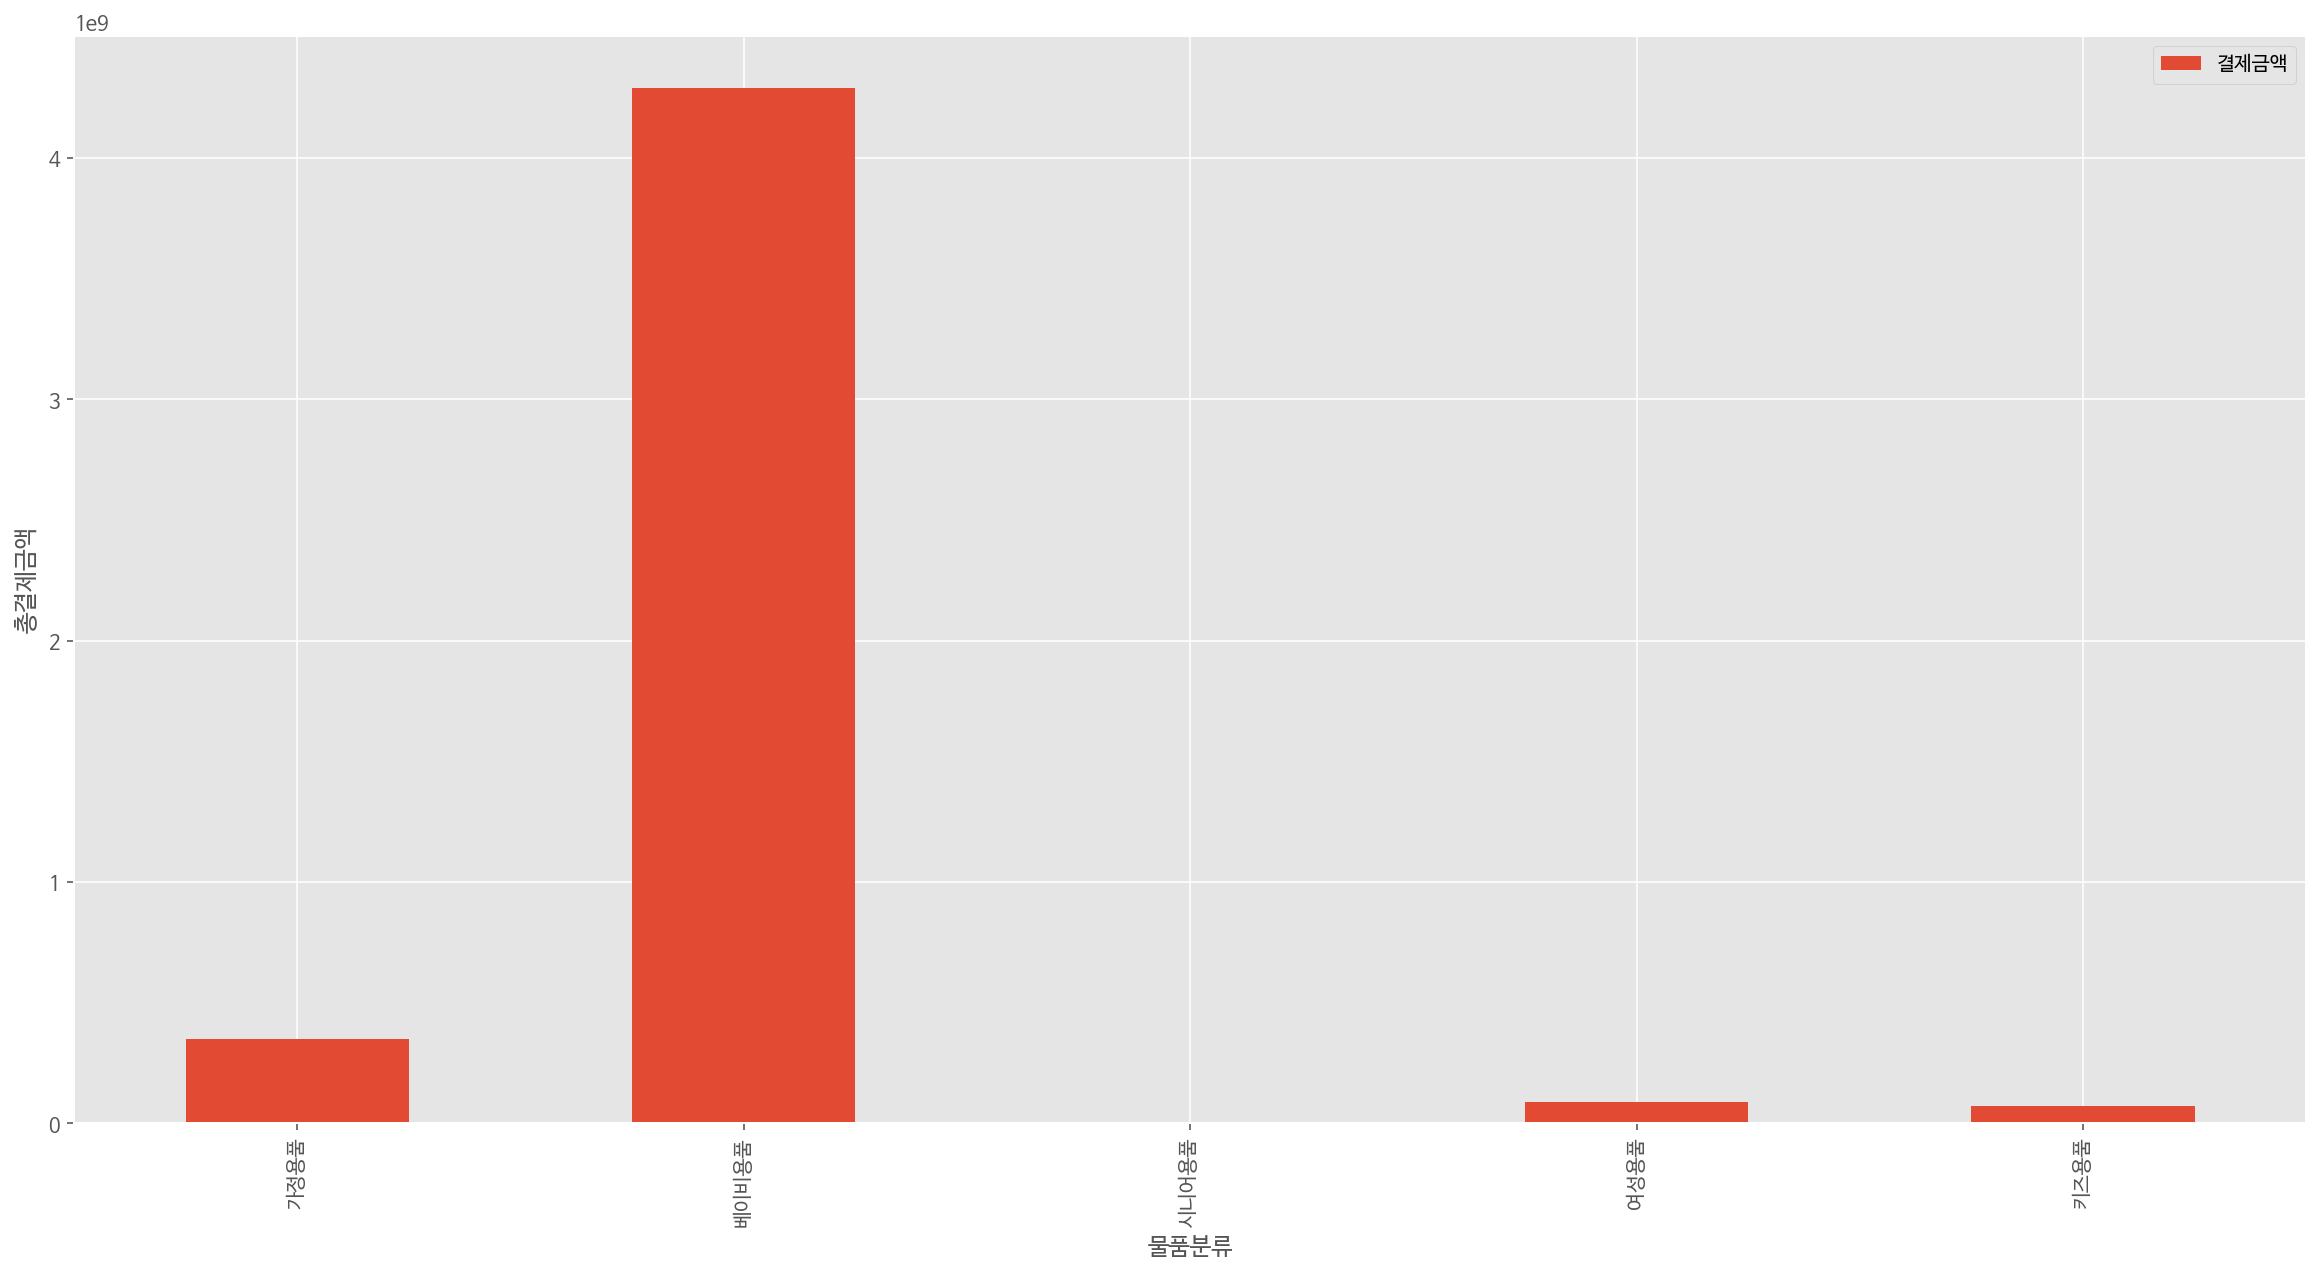

In [ ]:
df_clas_sum1.plot.bar(ylabel = '총결제금액',figsize=(20,10))

In [ ]:
result = df_raw_LEFT_JOIN.groupby(['물품분류','물품중분류'])['결제금액'].sum()

In [ ]:
result

물품분류   물품중분류  
가정용품   건강기능식품        1961598
       건강보조식품         253750
       기타           13745015
       마스크          31960204
       마이비데         33520797
       목욕용품          3212427
       물티슈           4458580
       생리대            235873
       스킨케어         14822321
       식품/음료        11800240
       외출용품            48000
       위생용품/워시      12625431
       의류/잡화           27700
       청소용품          6996340
       키친타올/행주      51208028
       휴지/티슈       163505946
베이비용품  기저귀        3408249828
       기타             343500
       목욕용품         26461979
       물티슈         141201034
       수유용품        537380040
       스킨케어         38603368
       식품/음료          776000
       완구/교구        12660693
       외출용품          5772085
       위생용품/세제      78161840
       위생용품/워시         22900
       의류/잡화        11495002
       이유용품         23977059
       출산용품          1773740
시니어용품  성인용기저귀         630359
       언더웨어          2644660
여성용품   산모전용제품        1127409
       생리대          87523571

In [ ]:
result = df_raw_LEFT_JOIN.groupby(['물품분류','물품중분류'])['주문번호'].value_counts()

In [ ]:
result

물품분류  물품중분류   주문번호                      
가정용품  건강기능식품  201903162161391               3
              201903122146409               2
              201903272201957               2
              201903272202286               2
              201902272089722               1
                                           ..
키즈용품  의류/잡화   20200803021023-52527821879    1
              20200804122255-55191598982    1
              20200805010613-83036431112    1
              20200805230220-55326425711    1
              20200806025146-38280071535    1
Name: 주문번호, Length: 190175, dtype: int64

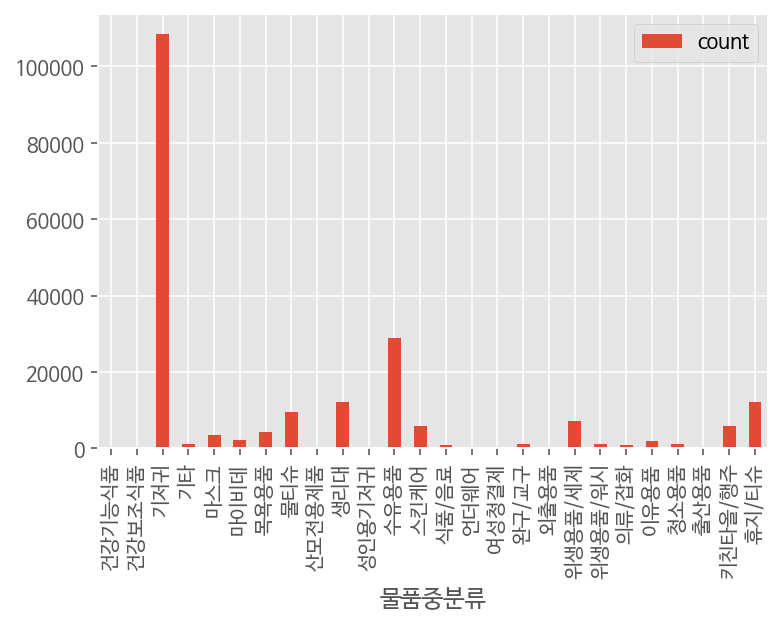

In [ ]:
pd.DataFrame(df_raw_LEFT_JOIN.groupby('물품중분류')['주문번호'].agg(['count'])).plot.bar()

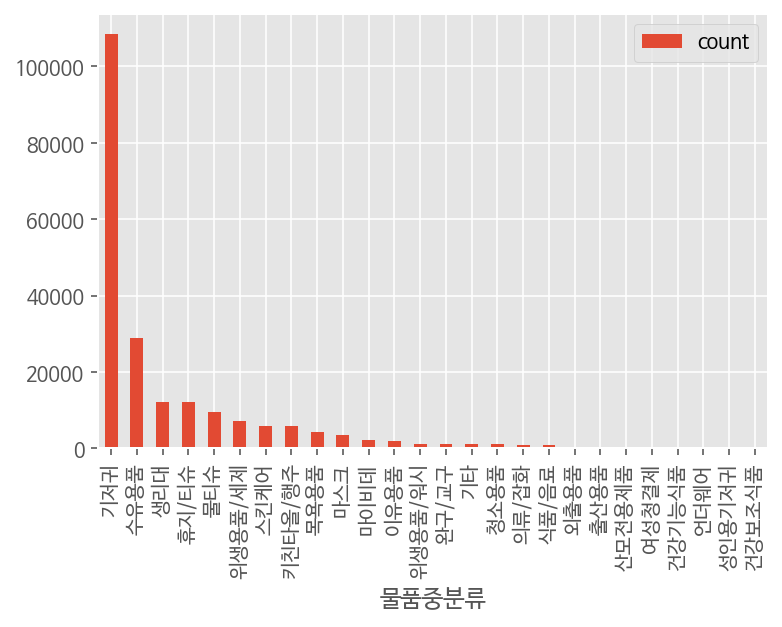

In [ ]:
pd.DataFrame(df_raw_LEFT_JOIN.groupby('물품중분류')['주문번호'].agg(['count'])).sort_values('count', ascending=False).plot.bar()

In [ ]:
df_raw_LEFT_JOIN[df_raw_LEFT_JOIN.물품중분류 == '기저귀'].groupby('브랜드명')['주문번호'].agg(['count'])

,count
브랜드명,
굿나이트,246
그린핑거,53
맘큐,12077
하기스,96014


In [ ]:
df_raw_LEFT_JOIN[df_raw_LEFT_JOIN.브랜드명 == '맘큐']['상품명']

95        맘큐 허그박스
325       맘큐 허그박스
581       맘큐 허그박스
587       맘큐 허그박스
705       맘큐 허그박스
           ...   
210028    맘큐 허그박스
210029    맘큐 허그박스
210032    맘큐 허그박스
210035    맘큐 허그박스
210037    맘큐 허그박스
Name: 상품명, Length: 12077, dtype: object

In [ ]:
data_2.to_csv('data_2.csv', encoding='utf-8-sig')

In [ ]:
# 중분류 매출액. 판매 건수 line plot -> 내림차순 정렬

In [ ]:
df_clas_sum2 = pd.pivot_table(data=df_raw_LEFT_JOIN, index = '물품중분류', values = '결제금액', aggfunc = 'sum')
df_clas_sum2

,결제금액
물품중분류,
건강기능식품,1961598
건강보조식품,253750
기저귀,3408249828
기타,14212015
마스크,31960204
마이비데,33520797
목욕용품,49818451
물티슈,145659614
산모전용제품,1127409


In [ ]:
df_raw_LEFT_JOIN['물품중분류'].value_counts()

기저귀        108390
수유용품        28800
생리대         12228
휴지/티슈       12136
물티슈          9622
위생용품/세제      7146
스킨케어         5869
키친타올/행주      5825
목욕용품         4200
마스크          3509
마이비데         2169
이유용품         1919
위생용품/워시      1242
완구/교구        1213
기타           1090
청소용품         1068
의류/잡화        1014
식품/음료         940
외출용품          466
출산용품          161
산모전용제품        129
여성청결제          80
건강기능식품         64
언더웨어           57
성인용기저귀         23
건강보조식품          6
Name: 물품중분류, dtype: int64

In [ ]:
clas_sort = pd.Series(df_raw_LEFT_JOIN['물품중분류'].value_counts())
df_clas_sort = clas_sort.to_frame('판매건수')
print(df_clas_sort)

           판매건수
기저귀      108390
수유용품      28800
생리대       12228
휴지/티슈     12136
물티슈        9622
위생용품/세제    7146
스킨케어       5869
키친타올/행주    5825
목욕용품       4200
마스크        3509
마이비데       2169
이유용품       1919
위생용품/워시    1242
완구/교구      1213
기타         1090
청소용품       1068
의류/잡화      1014
식품/음료       940
외출용품        466
출산용품        161
산모전용제품      129
여성청결제        80
건강기능식품       64
언더웨어         57
성인용기저귀       23
건강보조식품        6


In [ ]:
df_clas_sort2 = df_clas_sort.reset_index()
df_clas_sort2

,index,판매건수
0,기저귀,108390
1,수유용품,28800
2,생리대,12228
3,휴지/티슈,12136
4,물티슈,9622
5,위생용품/세제,7146
6,스킨케어,5869
7,키친타올/행주,5825
8,목욕용품,4200
9,마스크,3509


In [ ]:
df_clas_sort2 = df_clas_sort2.rename(columns={'index' : '물품중분류'})
df_clas_sort2

,물품중분류,판매건수
0,기저귀,108390
1,수유용품,28800
2,생리대,12228
3,휴지/티슈,12136
4,물티슈,9622
5,위생용품/세제,7146
6,스킨케어,5869
7,키친타올/행주,5825
8,목욕용품,4200
9,마스크,3509


In [ ]:
df_clas_sort3 = df_clas_sort2.set_index(keys='물품중분류')
df_clas_sort3

,판매건수
물품중분류,
기저귀,108390
수유용품,28800
생리대,12228
휴지/티슈,12136
물티슈,9622
위생용품/세제,7146
스킨케어,5869
키친타올/행주,5825
목욕용품,4200


In [ ]:
df_clas_final = pd.merge(df_clas_sum2, df_clas_sort3, how = 'left', on = '물품중분류')
df_clas_final

,결제금액,판매건수
물품중분류,,
건강기능식품,1961598,64
건강보조식품,253750,6
기저귀,3408249828,108390
기타,14212015,1090
마스크,31960204,3509
마이비데,33520797,2169
목욕용품,49818451,4200
물티슈,145659614,9622
산모전용제품,1127409,129


In [ ]:
df_clas_final2 = df_clas_final.reset_index()
df_clas_final2

,물품중분류,결제금액,판매건수
0,건강기능식품,1961598,64
1,건강보조식품,253750,6
2,기저귀,3408249828,108390
3,기타,14212015,1090
4,마스크,31960204,3509
5,마이비데,33520797,2169
6,목욕용품,49818451,4200
7,물티슈,145659614,9622
8,산모전용제품,1127409,129
9,생리대,87759444,12228


In [ ]:
df_clas_final3 = df_clas_final2.sort_values('결제금액', ascending=False)
df_clas_final4 = df_clas_final3.reset_index(drop=True)
df_clas_final4

,물품중분류,결제금액,판매건수
0,기저귀,3408249828,108390
1,수유용품,537380040,28800
2,휴지/티슈,163624513,12136
3,물티슈,145659614,9622
4,생리대,87759444,12228
5,스킨케어,83825632,5869
6,위생용품/세제,81151873,7146
7,키친타올/행주,51208028,5825
8,목욕용품,49818451,4200
9,마이비데,33520797,2169


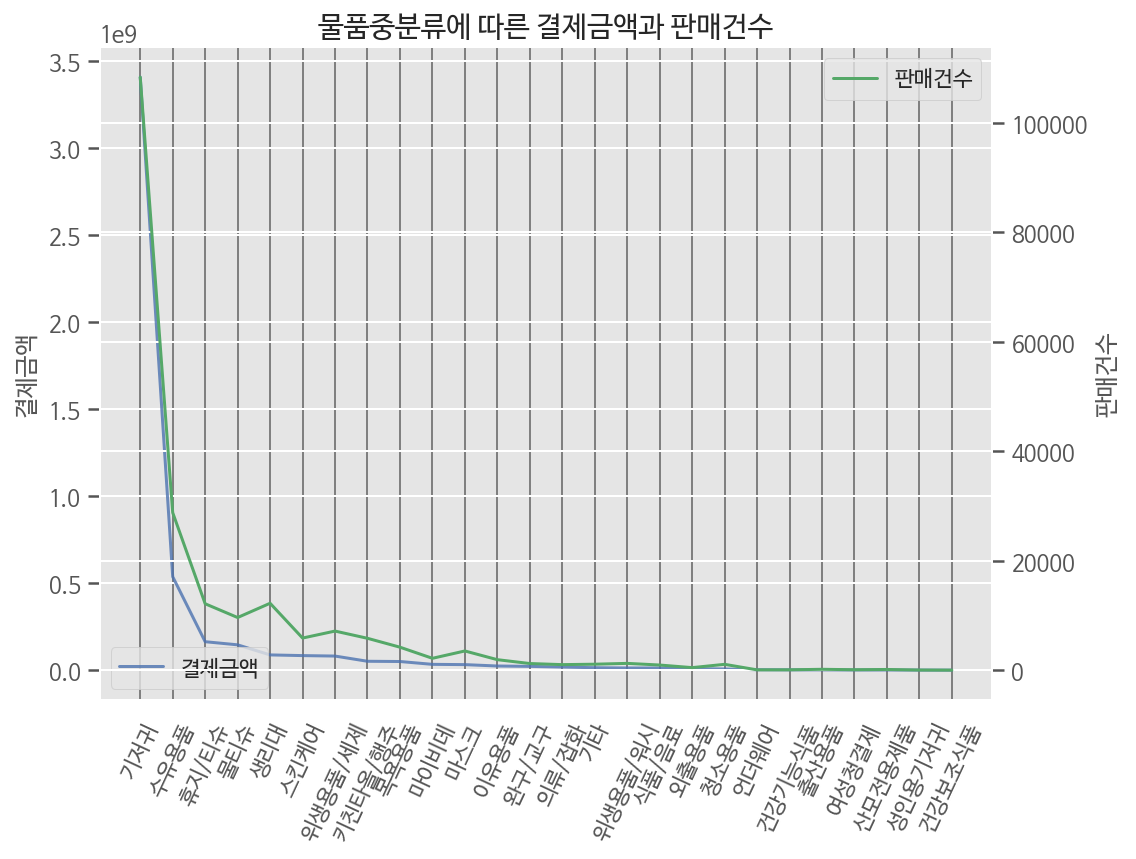

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
plt.title("물품중분류에 따른 결제금액과 판매건수")
ax1.plot(df_clas_final4['물품중분류'], df_clas_final4['결제금액'], color='b', label='결제금액', alpha=0.8)
ax2 = ax1.twinx()
ax2.plot(df_clas_final4['물품중분류'], df_clas_final4['판매건수'], color='g', label='판매건수', alpha=1.0)

# 각 세로축의 이름
ax1.set_ylabel('결제금액')
ax2.set_ylabel('판매건수')

# 격자
ax1.tick_params(axis='x', rotation=65)

ax1.grid(axis='x', which='major', color='gray', alpha=1.0)
ax1.grid(axis='x', which='minor', color='gray', alpha=0.3)

# 범례위치(legend)
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')

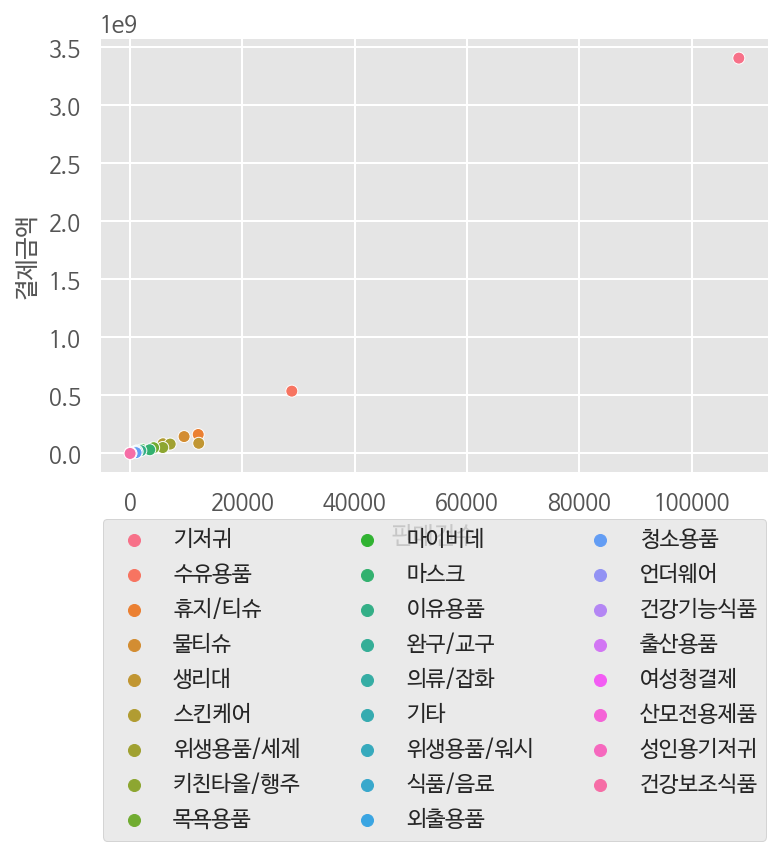

In [ ]:
sns.scatterplot(x='판매건수', y='결제금액', hue = '물품중분류', data=df_clas_final4) #line plot과 구간 평균/분포로 계산됨
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3)